#**Dataset Generation**

In [1]:
!pip install spotipy

     |████████████████████████████████| 138 kB 6.4 MB/s 
     |████████████████████████████████| 62 kB 677 kB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [1]:
import spotipy
import numpy as np
import time
import tqdm
from spotipy.oauth2 import SpotifyClientCredentials 
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd


In [2]:
c_id = '64375ba728b44b9dbce6ac41962040fd'
c_secret = '1ae44859330946b3bc4d025e9146fde4'
c_credentials = SpotifyClientCredentials(c_id, c_secret)
sp = spotipy.Spotify(client_credentials_manager=c_credentials)

In [3]:
"""
genre used to fetch links for our data set
"""
genre = ["Rock" , "Pop" , "Classical" , "Jazz" , "Indie" , "Reggae" , "Metalcore" , "Emo" , "Bollywood" , "Zydeco" , "K-pop" , "Rap" , "Neurofunk" , "Romance" , "Funk" , "party"] 
prefix = "genre:"

In [4]:
song_id=[]
for i in range(len(genre)):
  for m in range(19):
    list_of_tracks = sp.search(q=prefix+genre[i], type='track', limit=50,offset=m*50)
    id_list = list_of_tracks['tracks']['items']
    for k in range(len(id_list)):
      song_id.append(id_list[k]['uri'][14:])

In [ ]:
for i in range (22):
  year_query='year='+str(2000+i)
  for m in range(20):
    list_of_tracks = sp.search(q=year_query, type='track', limit=50,offset=m*50)
    id_list = list_of_tracks['tracks']['items']
    for k in range(len(id_list)):
      song_id.append(id_list[k]['uri'][14:])

In [6]:
list_of_songs=song_id

In [7]:
song_data=[]

In [8]:
def getdata(uri):
  af = sp.audio_features(uri)
  md = sp.track(uri)
  song_data.append([uri,md['name'], md['album']['artists'][0]['name'], md['album']['name'], md['album']['release_date'], 
                    af[0]['Accousticnesss'], af[0]['Dancebility'],md['duration_ms'], af[0]['Energy'],
                    af[0]['Instrumentalness'], af[0]['key'], af[0]['Liveliness'],af[0]['Loudness'], 
                    af[0]['mode'], af[0]['Speechiness'], af[0]['Tempo'], af[0]['time_signature'],
                    af[0]['valence'], md['Popularity']])


In [ ]:
list_to_check=list_of_songs
print(len(list_to_check))
for i in tqdm(range(len(list_to_check))):
  if i%1000==0:
    print(len(song_data))
    time.sleep(3)
  try:
    getdata(list_to_check[i])
  except:
    pass

In [ ]:
df = pd.DataFrame(song_data, columns = ['Song ID','Song Name', 'Artist Name', 'Album Name', 'Release Date', 'Accousticness', 'Dancebility', 'Song Duration', 'Energy', 'Instrumentalness', 
        'Key', 'Liveliness', 'Loudness', 'Mode', 'Speechiness', 'Tempo', 'Time Signature', 'Valence', 'Popularity'])

In [ ]:
df.drop_duplicates(subset="Song Name", inplace = True)

In [ ]:
df.shape

In [ ]:
df.Popularity.plot.hist(alpha=1)

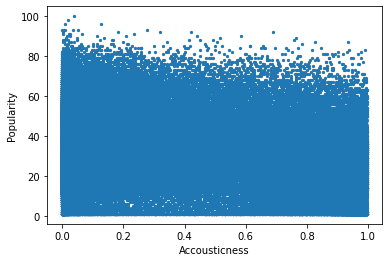

In [ ]:
df.plot.scatter(x='Accousticness',y='Popularity',s=5)

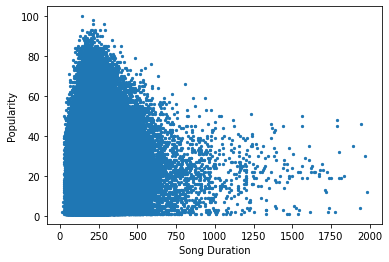

In [ ]:
df.plot.scatter(x='Song Duration',y='Popularity',s=5)

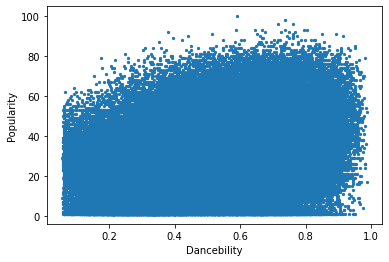

In [ ]:
df.plot.scatter(x='Dancebility',y='Popularity',s=5)

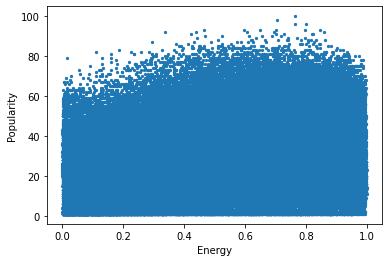

In [ ]:
df.plot.scatter(x='Energy',y='Popularity',s=5)

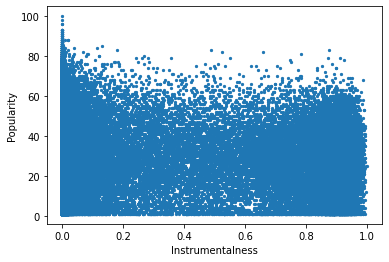

In [ ]:
df.plot.scatter(x='Instrumentalness',y='Popularity',s=5)

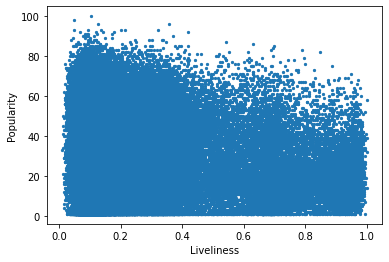

In [ ]:
df.plot.scatter(x='Liveliness',y='Popularity',s=5)

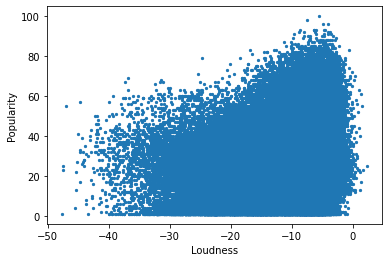

In [ ]:
df.plot.scatter(x='Loudness',y='Popularity',s=5)

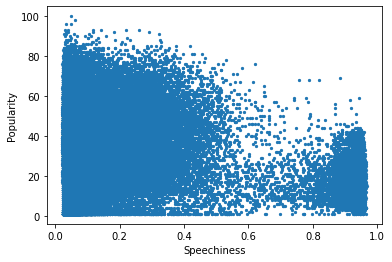

In [ ]:
df.plot.scatter(x='Speechiness',y='Popularity',s=5)

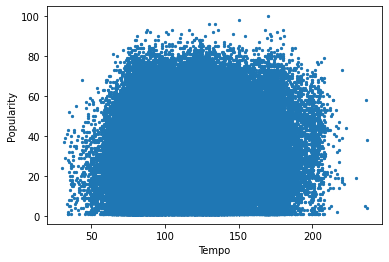

In [ ]:
df.plot.scatter(x='Tempo',y='Popularity',s=5)